In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
  print(f"Scraping page {i}")

  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  response = requests.get(url)
  content = response.content
  parsed_content = BeautifulSoup(content, "html.parser")
  for para in parsed_content.find_all("div", {"class" : "text_content"}):
    reviews.append(para.get_text())

  print(f" ---> {len(reviews)} total reviews")

Scraping page 1
 ---> 100 total reviews
Scraping page 2
 ---> 200 total reviews
Scraping page 3
 ---> 300 total reviews
Scraping page 4
 ---> 400 total reviews
Scraping page 5
 ---> 500 total reviews
Scraping page 6
 ---> 600 total reviews
Scraping page 7
 ---> 700 total reviews
Scraping page 8
 ---> 800 total reviews
Scraping page 9
 ---> 900 total reviews
Scraping page 10
 ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst business class ex...
1,Not Verified | Quite possibly the worst busin...
2,Not Verified | I will never be flying with BA...
3,✅ Trip Verified | On the my trip to Mexico Ci...
4,✅ Trip Verified | I upgraded at check in to C...


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
import os

In [ ]:
folder_path = 'data'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

file_path = os.path.join(folder_path, 'BA_reviews.csv')

df.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")

File saved at: data/BA_reviews.csv


In [ ]:
###perform data cleaning in order to prepare the data for analysis.
#When the data is clean, you should perform your own analysis to uncover some insights.
#As a starting point, you could look at topic modelling, sentiment analysis or wordclouds
#to provide some insight into the content of the reviews.
#It is recommended to complete this task using Python, however,
#you can use any tool that you wish.

In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
df.head()

,reviews
0,✅ Trip Verified | The worst business class ex...
1,Not Verified | Quite possibly the worst busin...
2,Not Verified | I will never be flying with BA...
3,✅ Trip Verified | On the my trip to Mexico Ci...
4,✅ Trip Verified | I upgraded at check in to C...


In [ ]:
### In this project, I scrapped customer reviews on British Airways from a website "Skytrax".
# After creating a dataframe using the data, I cleaned removing any duplicates and missing values.
# In the next step I cleaned and prepocessed the data for analysis
# Then I performed sentiment analysis and created graphs.

from nltk import word_tokenize
import pandas as pd

def preprocess_reviews(reviews):
    words = word_tokenize(reviews)
    clean_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(clean_words)

# Apply preprocessing to the reviews column
df['clean_reviews'] = df['reviews'].apply(preprocess_reviews)

In [ ]:
#sentiment analysis
from textblob import TextBlob

In [ ]:
def analyze_sentiment(reviews):
  analysis = TextBlob(reviews)
  return analysis.sentiment.polarity

In [ ]:
df['sentiment_score'] = df['reviews'].apply(analyze_sentiment)

In [ ]:
df.head()

,reviews,clean_reviews,sentiment_score
0,✅ Trip Verified | The worst business class ex...,trip verified worst business class experience ...,-0.019097
1,Not Verified | Quite possibly the worst busin...,verified quite possibly worst business class e...,-0.021667
2,Not Verified | I will never be flying with BA...,verified never flying ba first last flying sin...,0.106034
3,✅ Trip Verified | On the my trip to Mexico Ci...,trip verified trip mexico city opportunity exp...,0.141721
4,✅ Trip Verified | I upgraded at check in to C...,trip verified upgraded check club europe seat ...,0.694231


In [ ]:
#topic modeling
import gensim
from gensim import corpora

In [ ]:
tokenized_reviews = [word_tokenize(reviews) for reviews in df['clean_reviews']]

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)

In [ ]:
corpus = [dictionary.doc2bow(reviews) for reviews in tokenized_reviews]

In [ ]:
#lda model
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word=dictionary, num_topics=5, passes=10)

In [ ]:
for idx , topic in lda_model.print_topics():
  print(f"Token {idx}:{topic}")

Token 0:0.031*"flight" + 0.014*"verified" + 0.013*"seat" + 0.013*"trip" + 0.012*"service" + 0.011*"time" + 0.011*"ba" + 0.010*"hour" + 0.008*"staff" + 0.007*"one"
Token 1:0.021*"ba" + 0.019*"flight" + 0.009*"verified" + 0.007*"ticket" + 0.007*"trip" + 0.006*"luggage" + 0.006*"staff" + 0.006*"could" + 0.005*"booked" + 0.005*"day"
Token 2:0.037*"flight" + 0.017*"ba" + 0.011*"verified" + 0.010*"customer" + 0.010*"london" + 0.010*"hour" + 0.010*"trip" + 0.010*"british" + 0.010*"airway" + 0.009*"u"
Token 3:0.020*"flight" + 0.015*"crew" + 0.013*"verified" + 0.011*"cabin" + 0.010*"trip" + 0.010*"ba" + 0.010*"good" + 0.009*"service" + 0.008*"time" + 0.008*"boarding"
Token 4:0.025*"seat" + 0.018*"ba" + 0.016*"flight" + 0.016*"class" + 0.013*"business" + 0.013*"verified" + 0.012*"trip" + 0.011*"food" + 0.010*"good" + 0.009*"service"


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
all_reviews = ' '.join(df['clean_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

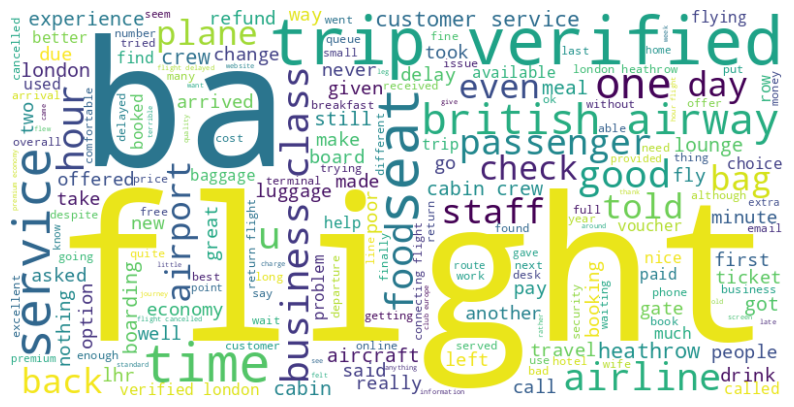

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

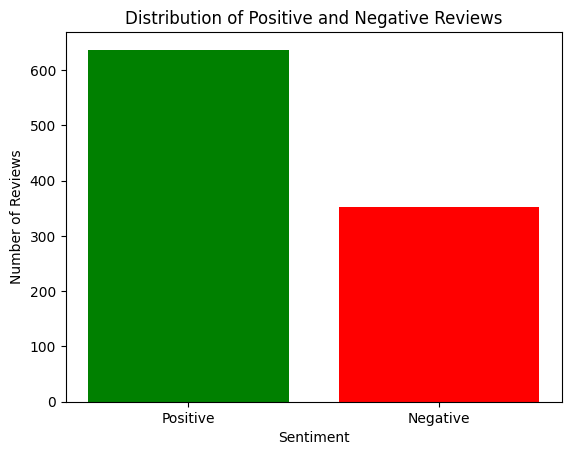

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
positive_reviews_count = df[df['sentiment_score'] > 0].shape[0]
negative_reviews_count = df[df['sentiment_score'] < 0].shape[0]

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive_reviews_count, negative_reviews_count], color=['green', 'red'])
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()